# 第1章 Pandas基础

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 查看Pandas版本

In [158]:
pd.__version__

'1.0.5'

## 一、文件读取与写入
### 1. 读取
#### （a）csv格式

In [159]:
df = pd.read_csv('data/table.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


#### （b）txt格式

In [160]:
df_txt = pd.read_table('data/table.txt') #可设置sep分隔符参数
df_txt

,col1,col2,col3,col4
0,2,a,1.4,apple
1,3,b,3.4,banana
2,6,c,2.5,orange
3,5,d,3.2,lemon


#### （c）xls或xlsx格式

In [161]:
#需要安装xlrd包
df_excel = pd.read_excel('data/table.xlsx')
df_excel.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


### 2. 写入

#### （a）csv格式

In [162]:
df.to_csv('data/new_table.csv')
#df.to_csv('data/new_table.csv', index=False) #保存时除去行索引

#### （b）xls或xlsx格式

In [163]:
#需要安装openpyxl
df.to_excel('data/new_table2.xlsx', sheet_name='Sheet1')

## 二、基本数据结构
### 1. Series
#### （a）创建一个Series

#### 对于一个Series，其中最常用的属性为值（values），索引（index），名字（name），类型（dtype）

In [164]:
a = pd.Series(data=[1, 4], index=[5, 6])
a

5    1
6    4
dtype: int64

In [165]:
s = pd.Series(np.random.randn(5),index=['a','b','c','d','e'],name='这是一个Series',dtype='float64')
s

a   -0.144653
b   -0.866880
c   -0.557562
d    0.844197
e    0.396452
Name: 这是一个Series, dtype: float64

In [166]:
# 追加元素
s.append(a)

a   -0.144653
b   -0.866880
c   -0.557562
d    0.844197
e    0.396452
5    1.000000
6    4.000000
dtype: float64

#### （b）访问Series属性

In [167]:
s.values

array([-0.14465299, -0.8668798 , -0.5575617 ,  0.84419695,  0.39645196])

In [168]:
# 相当于columns
s.name

'这是一个Series'

In [169]:
s.to_frame()

,这是一个Series
a,-0.144653
b,-0.866880
c,-0.557562
d,0.844197
e,0.396452


In [170]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [171]:
s.dtype

dtype('float64')

#### （c）取出某一个元素
#### 将在第2章详细讨论索引的应用，这里先大致了解

In [172]:
s['a']

-0.14465298815382235

#### （d）调用方法

In [173]:
s.mean()

-0.06568911609002617

#### Series有相当多的方法可以调用：

In [174]:
print([attr for attr in dir(s) if not attr.startswith('_')])

['T', 'a', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'argmax', 'argmin', 'argsort', 'array', 'asfreq', 'asof', 'astype', 'at', 'at_time', 'attrs', 'autocorr', 'axes', 'b', 'between', 'between_time', 'bfill', 'bool', 'c', 'clip', 'combine', 'combine_first', 'convert_dtypes', 'copy', 'corr', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'd', 'describe', 'diff', 'div', 'divide', 'divmod', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtype', 'dtypes', 'duplicated', 'e', 'empty', 'eq', 'equals', 'ewm', 'expanding', 'explode', 'factorize', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'floordiv', 'ge', 'get', 'groupby', 'gt', 'hasnans', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'interpolate', 'is_monotonic', 'is_monotonic_decreasing', 'is_monotonic_increasing', 'is_unique', 'isin', 'isna', 'isnull', 'item', 'items', 'iteritems', 'keys', 'kurt', 'kurtosis', 'la

### 2. DataFrame
#### （a）创建一个DataFrame

In [175]:
# DataFrame的创建按照二维的形式进行创建
df = pd.DataFrame({'col1':list('abcde'),'col2':range(5,10),'col3':[1.3,2.5,3.6,4.6,5.8]},
                 index=list('一二三四五'))
df

,col1,col2,col3
一,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


#### （b）从DataFrame取出一列为Series

In [176]:
df['col1']

一    a
二    b
三    c
四    d
五    e
Name: col1, dtype: object

In [177]:
# df["col3"].dtype
df.col3.dtypes

dtype('float64')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 一 to 五
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      object 
 1   col2    5 non-null      int64  
 2   col3    5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [179]:
type(df)

pandas.core.frame.DataFrame

In [180]:
type(df['col1'])

pandas.core.series.Series

#### （c）修改行或列名

In [181]:
df.rename(index={'一':'one'},columns={'col1':'new_col1'})

,new_col1,col2,col3
one,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


#### （d）调用属性和方法

In [182]:
df.index

Index(['一', '二', '三', '四', '五'], dtype='object')

In [183]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [184]:
df.values

array([['a', 5, 1.3],
       ['b', 6, 2.5],
       ['c', 7, 3.6],
       ['d', 8, 4.6],
       ['e', 9, 5.8]], dtype=object)

In [185]:
df.shape

(5, 3)

In [186]:
df.mean() #本质上是一种Aggregation操作，将在第3章详细介绍

col2    7.00
col3    3.56
dtype: float64

In [187]:
df.col2.var()

2.5

In [188]:
df.col2.std()

1.5811388300841898

In [189]:
df.col2.mean()

7.0

#### （e）索引对齐特性
#### 这是Pandas中非常强大的特性，不理解这一特性有时就会造成一些麻烦,遵循索引一致原则

In [190]:
df1 = pd.DataFrame({'A':[1,2,3]},index=[1,2,3])
df2 = pd.DataFrame({'A':[1,2,3]},index=[3,1,2])
df1-df2 #由于索引对齐，因此结果不是0

,A
1,-1
2,-1
3,2


In [191]:
df1

,A
1,1
2,2
3,3


In [192]:
df2

,A
3,1
1,2
2,3


#### （f）列的删除与添加
#### 对于删除而言，可以使用drop函数或del或pop

In [193]:
df

,col1,col2,col3
一,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


In [194]:
df.drop(index='五',columns='col1') #设置inplace=True后会直接在原DataFrame中改动
df

,col1,col2,col3
一,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


In [195]:
df['col1']=[1,2,3,4,5]
df

,col1,col2,col3
一,1,5,1.3
二,2,6,2.5
三,3,7,3.6
四,4,8,4.6
五,5,9,5.8


In [196]:
del df['col1']
df

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


#### pop方法直接在原来的DataFrame上操作，且返回被删除的列，与python中的pop函数类似

In [197]:
df['col1']=[1,2,3,4,5]
df.pop('col1')

一    1
二    2
三    3
四    4
五    5
Name: col1, dtype: int64

In [198]:
df

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


#### 可以直接增加新的列，也可以使用assign方法

In [199]:
df1['B']=list('abc')
df1

,A,B
1,1,a
2,2,b
3,3,c


In [200]:
df1.assign(C=pd.Series(list('def')))
#思考：为什么会出现NaN？（提示：索引对齐）assign左右两边的索引不一样，请问结果的索引谁说了算？

,A,B,C
1,1,a,e
2,2,b,f
3,3,c,NaN


#### 但assign方法不会对原DataFrame做修改

In [201]:
df1

,A,B
1,1,a
2,2,b
3,3,c


#### （g）根据类型选择列

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 一 to 五
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col2    5 non-null      int64  
 1   col3    5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 280.0+ bytes


In [215]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [216]:
# 获得指定特征类型的特征
df.select_dtypes(include=["float"]).columns.tolist()

['col3']

In [217]:
df.select_dtypes(include=['number']).head()

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


In [218]:
# 包含指定类型的数据
df.select_dtypes(include=['float']).head()

,col3
一,1.3
二,2.5
三,3.6
四,4.6
五,5.8


In [219]:
# 不包含指定类型的数据
df.select_dtypes(exclude=["int"]).columns.tolist()

['col3']

#### （h）将Series转换为DataFrame

In [220]:
s = df.mean()
s

col2    7.00
col3    3.56
dtype: float64

In [221]:
s.name='to_DataFrame'
s

col2    7.00
col3    3.56
Name: to_DataFrame, dtype: float64

In [225]:
# Series转DataFrame
s.to_frame(name="mean")

,mean
col2,7.00
col3,3.56


#### 使用T符号可以转置

In [223]:
s.to_frame().T

,col2,col3
to_DataFrame,7.0,3.56


## 三、常用基本函数
#### 从下面开始，包括后面所有章节，我们都会用到这份虚拟的数据集

In [230]:
df = pd.read_csv('data/table.csv')

### 1. head和tail

In [231]:
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


In [232]:
df.tail()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
30,S_2,C_4,2401,F,street_2,192,62,45.3,A
31,S_2,C_4,2402,M,street_7,166,82,48.7,B
32,S_2,C_4,2403,F,street_6,158,60,59.7,B+
33,S_2,C_4,2404,F,street_2,160,84,67.7,B
34,S_2,C_4,2405,F,street_6,193,54,47.6,B


#### 可以指定n参数显示多少行

In [233]:
df.head(3)

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+


### 2. unique和nunique

#### nunique显示有多少个唯一值

In [234]:
df['Physics'].nunique()

7

In [235]:
df.Class.nunique()

4

#### unique显示所有的唯一值

In [236]:
df['Physics'].unique()

array(['A+', 'B+', 'B-', 'A-', 'B', 'A', 'C'], dtype=object)

### 3. count和value_counts

#### count返回非缺失值元素个数

In [239]:
df['Physics'].count()

35

#### value_counts返回每个元素有多少个(重点使用)

In [241]:
df['Physics'].value_counts()

B+    9
B     8
B-    6
A     4
A-    3
A+    3
C     2
Name: Physics, dtype: int64

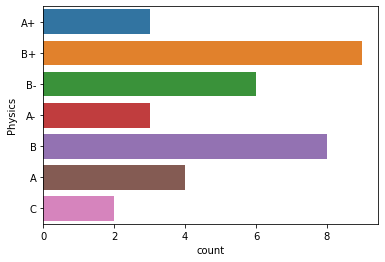

In [253]:
sns.countplot(y = df.Physics, data=df, orient="h" )
plt.show()

### 4. describe和info

#### info函数返回有哪些列、有多少非缺失值、每列的类型

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    35 non-null     object 
 2   ID       35 non-null     int64  
 3   Gender   35 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   35 non-null     int64  
 7   Math     35 non-null     float64
 8   Physics  35 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.6+ KB


#### describe默认统计数值型数据的各个统计量

In [59]:
df.describe()

,ID,Height,Weight,Math
count,35.00000,35.000000,35.000000,35.000000
mean,1803.00000,174.142857,74.657143,61.351429
std,536.87741,13.541098,12.895377,19.915164
min,1101.00000,155.000000,53.000000,31.500000
25%,1204.50000,161.000000,63.000000,47.400000
50%,2103.00000,173.000000,74.000000,61.700000
75%,2301.50000,187.500000,82.000000,77.100000
max,2405.00000,195.000000,100.000000,97.000000


#### 可以自行选择分位数

In [60]:
df.describe(percentiles=[.05, .25, .75, .95])

,ID,Height,Weight,Math
count,35.00000,35.000000,35.000000,35.000000
mean,1803.00000,174.142857,74.657143,61.351429
std,536.87741,13.541098,12.895377,19.915164
min,1101.00000,155.000000,53.000000,31.500000
5%,1102.70000,157.000000,56.100000,32.640000
25%,1204.50000,161.000000,63.000000,47.400000
50%,2103.00000,173.000000,74.000000,61.700000
75%,2301.50000,187.500000,82.000000,77.100000
95%,2403.30000,193.300000,97.600000,90.040000
max,2405.00000,195.000000,100.000000,97.000000


In [61]:
# 数值性的数据
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35.0,1803.000000,536.877410,1101.0,1204.5,2103.0,2301.5,2405.0
Height,35.0,174.142857,13.541098,155.0,161.0,173.0,187.5,195.0
Weight,35.0,74.657143,12.895377,53.0,63.0,74.0,82.0,100.0
Math,35.0,61.351429,19.915164,31.5,47.4,61.7,77.1,97.0


In [62]:
# 对象数据(可以实现字符类型的数据的统计描述)
df.describe(include=["object"]).T

,count,unique,top,freq
School,35,2,S_2,20
Class,35,4,C_3,10
Gender,35,2,F,19
Address,35,6,street_4,8
Physics,35,7,B+,9


#### 对于非数值型也可以用describe函数

In [63]:
df['Physics'].describe()

count     35
unique     7
top       B+
freq       9
Name: Physics, dtype: object

In [64]:
df.select_dtypes(include=["object"]).columns

Index(['School', 'Class', 'Gender', 'Address', 'Physics'], dtype='object')

In [65]:
df.School.describe()

count      35
unique      2
top       S_2
freq       20
Name: School, dtype: object

### 5. idxmax和nlargest
#### idxmax函数返回最大值所在索引，在某些情况下特别适用，idxmin功能类似

In [66]:
df['Math'].idxmax()

5

#### nlargest函数返回前几个大的元素值，nsmallest功能类似

In [67]:
df['Math'].nlargest(3)

5     97.0
28    95.5
11    87.7
Name: Math, dtype: float64

### 6. clip和replace

#### clip和replace是两类替换函数
#### clip是对超过或者低于某些值的数进行截断

In [68]:
df['Math'].head()

0    34.0
1    32.5
2    87.2
3    80.4
4    84.8
Name: Math, dtype: float64

In [71]:
df['Math'].clip(33,80).head()

0    34.0
1    33.0
2    80.0
3    80.0
4    80.0
Name: Math, dtype: float64

In [72]:
df['Math'].mad()

16.924244897959188

#### replace是对某些值进行替换（替换value值）

In [73]:
df['Address'].head()

0    street_1
1    street_2
2    street_2
3    street_2
4    street_4
Name: Address, dtype: object

In [74]:
df['Address'].replace(['street_1','street_2'],['one','two']).head()

0         one
1         two
2         two
3         two
4    street_4
Name: Address, dtype: object

In [75]:
df.School.unique()

array(['S_1', 'S_2'], dtype=object)

In [76]:
# 非in_place做法
df["School"].replace(["S_1", "S_2"], ["白洪小学", "未央小学"]).head()

0    白洪小学
1    白洪小学
2    白洪小学
3    白洪小学
4    白洪小学
Name: School, dtype: object

#### 通过字典，可以直接在表中修改

In [77]:
df.replace({'Address':{'street_1':'one','street_2':'two'}}).head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,one,173,63,34.0,A+
1,S_1,C_1,1102,F,two,192,73,32.5,B+
2,S_1,C_1,1103,M,two,186,82,87.2,B+
3,S_1,C_1,1104,F,two,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


### 7. apply函数
#### apply是一个自由度很高的函数，在第3章我们还要提到
#### 对于Series，它可以迭代每一列的值操作：

In [78]:
df['Math'].apply(lambda x:str(x)+'!').head() #可以使用lambda表达式，也可以使用函数　lambda　输入（形参）：输出（return）

0    34.0!
1    32.5!
2    87.2!
3    80.4!
4    84.8!
Name: Math, dtype: object

In [79]:
df.School.apply(lambda x: str(x)+"学校").head()

0    S_1学校
1    S_1学校
2    S_1学校
3    S_1学校
4    S_1学校
Name: School, dtype: object

#### 对于DataFrame，它在默认axis=0下可以迭代每一个列操作：

In [80]:
df.apply(lambda x:x.apply(lambda x:str(x)+'!')).head() #这是一个稍显复杂的例子，有利于理解apply的功能

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1!,C_1!,1101!,M!,street_1!,173!,63!,34.0!,A+!
1,S_1!,C_1!,1102!,F!,street_2!,192!,73!,32.5!,B+!
2,S_1!,C_1!,1103!,M!,street_2!,186!,82!,87.2!,B+!
3,S_1!,C_1!,1104!,F!,street_2!,167!,81!,80.4!,B-!
4,S_1!,C_1!,1105!,F!,street_4!,159!,64!,84.8!,B+!


#### Pandas中的axis参数=0时，永远表示的是处理方向而不是聚合方向，当axis='index'或=0时，对列迭代对行聚合，行即为跨列，axis=1同理

## 四、排序

### 1. 索引排序

In [81]:
df.set_index('Math').head() #set_index函数可以设置索引，将在下一章详细介绍

,School,Class,ID,Gender,Address,Height,Weight,Physics
Math,,,,,,,,
34.0,S_1,C_1,1101,M,street_1,173,63,A+
32.5,S_1,C_1,1102,F,street_2,192,73,B+
87.2,S_1,C_1,1103,M,street_2,186,82,B+
80.4,S_1,C_1,1104,F,street_2,167,81,B-
84.8,S_1,C_1,1105,F,street_4,159,64,B+


In [82]:
df.set_index('Math').sort_index().head() #可以设置ascending参数，默认为升序，True

,School,Class,ID,Gender,Address,Height,Weight,Physics
Math,,,,,,,,
31.5,S_1,C_3,1301,M,street_4,161,68,B+
32.5,S_1,C_1,1102,F,street_2,192,73,B+
32.7,S_2,C_3,2302,M,street_5,171,88,A
33.8,S_1,C_2,1204,F,street_5,162,63,B
34.0,S_1,C_1,1101,M,street_1,173,63,A+


In [85]:
df.set_index("Weight").sort_index()

,School,Class,ID,Gender,Address,Height,Math,Physics
Weight,,,,,,,,
53,S_1,C_2,1203,M,street_6,160,58.8,A+
54,S_2,C_4,2405,F,street_6,193,47.6,B
57,S_1,C_3,1302,F,street_1,175,87.7,A-
60,S_2,C_4,2403,F,street_6,158,59.7,B+
61,S_2,C_1,2102,F,street_6,161,50.6,B+
61,S_2,C_1,2103,M,street_4,157,52.5,B-
62,S_2,C_4,2401,F,street_2,192,45.3,A
63,S_1,C_2,1205,F,street_6,167,68.4,B-
63,S_1,C_1,1101,M,street_1,173,34.0,A+


### 2. 值排序

In [86]:
df.sort_values(by='Class').head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
19,S_2,C_1,2105,M,street_4,170,81,34.2,A
18,S_2,C_1,2104,F,street_5,159,97,72.2,B+
16,S_2,C_1,2102,F,street_6,161,61,50.6,B+
15,S_2,C_1,2101,M,street_7,174,84,83.3,C


#### 多个值排序，即先对第一层排，在第一层相同的情况下对第二层排序

In [64]:
df.sort_values(by=['Address','Height']).head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
11,S_1,C_3,1302,F,street_1,175,57,87.7,A-
23,S_2,C_2,2204,M,street_1,175,74,47.2,B-
33,S_2,C_4,2404,F,street_2,160,84,67.7,B
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-


## 五、问题与练习
### 1. 问题
#### 【问题一】 Series和DataFrame有哪些常见属性和方法？
#### 【问题二】 value_counts会统计缺失值吗？
#### 【问题三】 如果有多个索引同时取到最大值，idxmax会返回所有这些索引吗？如果不会，那么怎么返回这些索引？
#### 【问题四】 在常用函数一节中，由于一些函数的功能比较简单，因此没有列入，现在将它们列在下面，请分别说明它们的用途并尝试使用。
#### sum/mean/median/mad/min/max/abs/std/var/quantile/cummax/cumsum/cumprod
#### 【问题五】 df.mean(axis=1)是什么意思？它与df.mean()的结果一样吗？问题四提到的函数也有axis参数吗？怎么使用？
#### 【问题六】 对值进行排序后，相同的值次序由什么决定？
#### 【问题七】 Pandas中为各类基础运算也定义了函数，比如s1.add(s2)表示两个Series相加，但既然已经有了'+'，是不是多此一举？
#### 【问题八】 如果DataFrame某一列的元素是numpy数组，那么将其保存到csv在读取后就会变成字符串，怎么解决？

### 2. 练习
#### 【练习一】 现有一份关于美剧《权力的游戏》剧本的数据集，请解决以下问题：
#### （a）在所有的数据中，一共出现了多少人物？
#### （b）以单元格计数（即简单把一个单元格视作一句），谁说了最多的话？
#### （c）以单词计数，谁说了最多的单词？（不是单句单词最多，是指每人说过单词的总数最多，为了简便，只以空格为单词分界点，不考虑其他情况）

In [65]:
pd.read_csv('data/Game_of_Thrones_Script.csv').head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


#### 【练习二】现有一份关于科比的投篮数据集，请解决如下问题：
#### （a）哪种action_type和combined_shot_type的组合是最多的？
#### （b）在所有被记录的game_id中，遭遇到最多的opponent是一个支？（由于一场比赛会有许多次投篮，但对阵的对手只有一个，本题相当于问科比和哪个队交锋次数最多）

In [66]:
pd.read_csv('data/Kobe_data.csv',index_col='shot_id').head()
#index_col的作用是将某一列作为行索引

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
